## 1 import

In [2]:
import os
# Glob for file manipulation 
from glob import glob 
import matplotlib.pyplot as plt
import numpy as np 
import geopandas as gpd 
import rasterio as rio 
import earthpy as et 
import earthpy.spatial as es 
import earthpy.plot as ep 

In [4]:
path = "LC81830262015142LGN00"
glob(os.path.join(path, "*"))

['LC81830262015142LGN00\\LC81830262015142LGN00_B1.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B10.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B11.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B2.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B3.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B4.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B5.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B6.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B7.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B8.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B9.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_BQA.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_MTL.txt']

In [5]:
all_landsat_post_bands = glob(os.path.join(path, "*B*.tif"))
all_landsat_post_bands

['LC81830262015142LGN00\\LC81830262015142LGN00_B1.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B10.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B11.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B2.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B3.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B4.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B5.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B6.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B7.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B8.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B9.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_BQA.TIF']

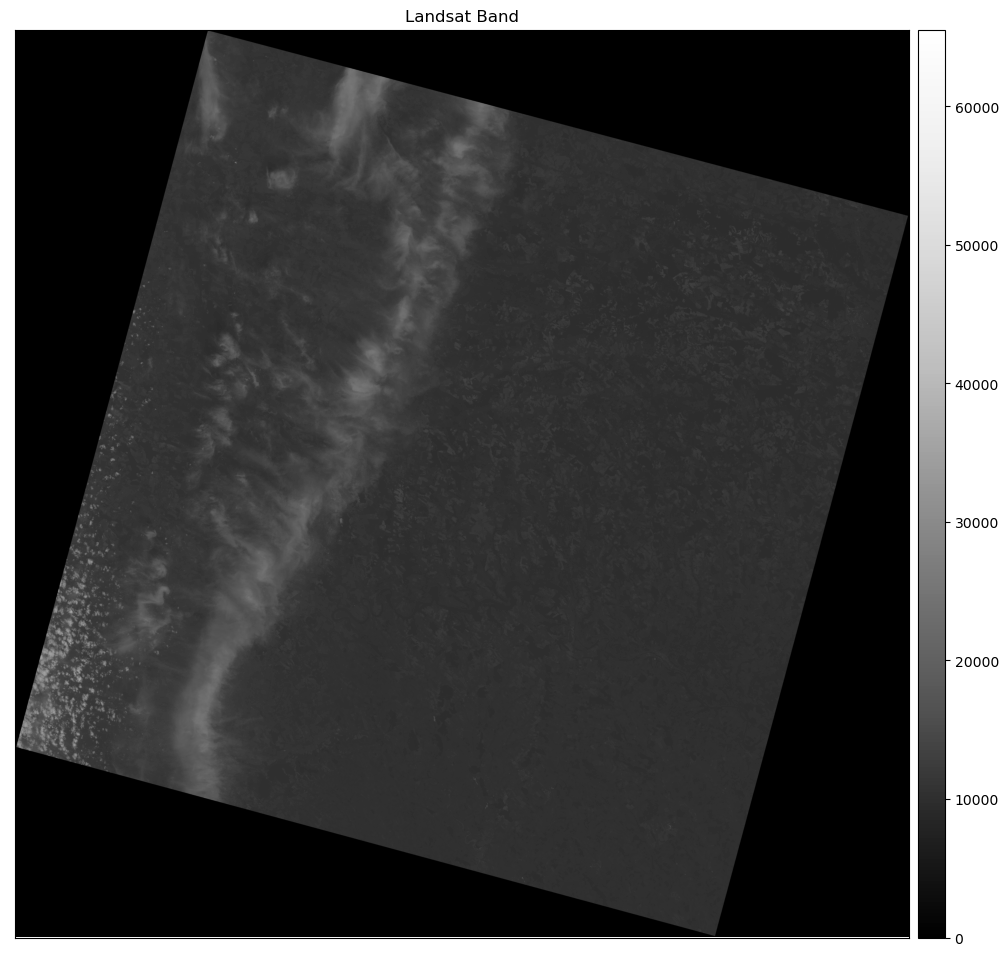

<AxesSubplot:title={'center':'Landsat Band'}>

In [7]:
# Open the TIF file using rasterio
# with rio.open(all_landsat_post_bands[3]) as src:
with rio.open(all_landsat_post_bands[0]) as src:
    tif_file = src.read()

# Plot the .TIF file using EarthPy
ep.plot_bands(tif_file[0],
              title="Landsat Band",
              scale=False)
# plt.show()

## 2 Crop

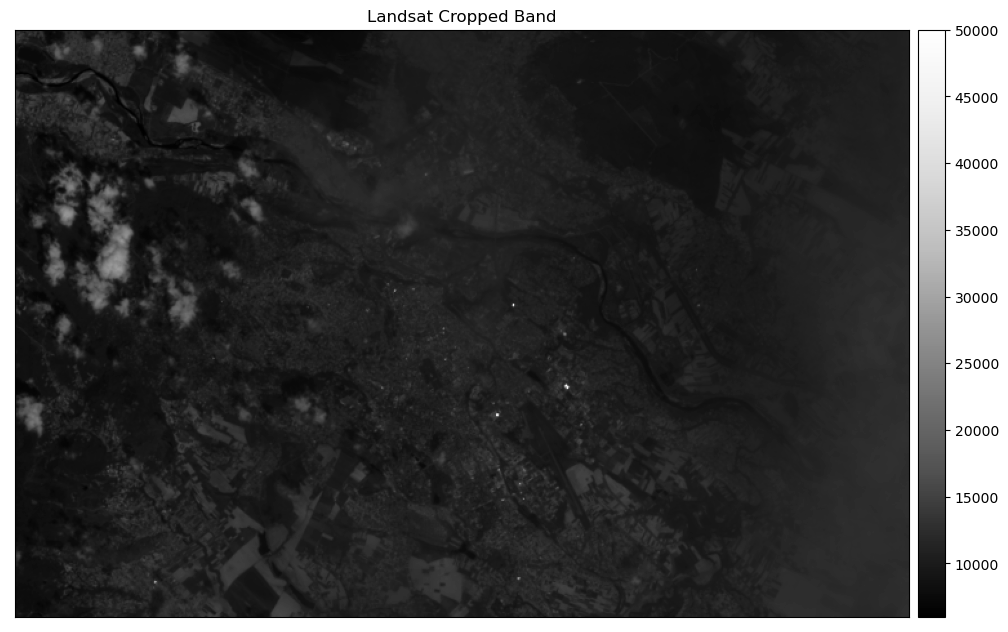

In [7]:
# Open up boundary extent in GeoPandas
from shapely.geometry import Polygon
d = {'geometry': [Polygon([(25.81, 48.35), (26.07, 48.34), (26.09, 48.23), (25.81, 48.23), (25.81, 48.35)])]}
crop_gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
# Open a single band and plot
with rio.open(all_landsat_post_bands[8]) as src:
    # Reproject the fire boundary shapefile to be the same CRS as the Landsat data
    crop_raster_profile = src.profile
    fire_boundary_utmz13 = crop_gdf.to_crs(crop_raster_profile["crs"])
    # Crop the landsat image to the extent of the fire boundary
    landsat_band4, landsat_metadata = es.crop_image(src, fire_boundary_utmz13)
ep.plot_bands(landsat_band4[0],
              title="Landsat Cropped Band",
              scale=False)
plt.show()


### Crop all

In [8]:
cropped_folder = "cropped-images"
if not os.path.isdir(cropped_folder):
    os.mkdir(cropped_folder)
cropped_file_list = es.crop_all(all_landsat_post_bands,
                                cropped_folder,
                                fire_boundary_utmz13,
                                overwrite=True,
                                verbose=True)
cropped_file_list

['cropped-images\\LC81830262015142LGN00_B1_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B10_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B11_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B2_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B3_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B4_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B5_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B6_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B7_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B8_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B9_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_BQA_crop.TIF']

## 3 stack and print

In [9]:

cropped_file_list = ['cropped-images\\LC81830262015142LGN00_B1_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B2_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B3_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B4_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B5_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B6_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B7_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B8_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B9_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B10_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B11_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_BQA_crop.TIF'
 ]

In [10]:
stack_folder = "stackOutput"
if not os.path.isdir(stack_folder):
    os.mkdir(stack_folder)
landsat_post_path = os.path.join(stack_folder, "stack.tif")
# This will create a new stacked raster with all bands
land_stack, land_meta = es.stack(cropped_file_list, landsat_post_path)
land_stack

array([[[12807, 12589, 12588, ..., 16535, 16605, 16625],
        [12806, 12528, 12599, ..., 16527, 16576, 16623],
        [12516, 12531, 12447, ..., 16544, 16635, 16675],
        ...,
        [11747, 11713, 12081, ..., 18354, 18359, 18348],
        [11688, 11740, 11870, ..., 18361, 18344, 18325],
        [11501, 11592, 11995, ..., 18353, 18324, 18366]],

       [[12021, 11655, 11780, ..., 15775, 15847, 15921],
        [12017, 11689, 11764, ..., 15788, 15886, 15931],
        [11635, 11663, 11645, ..., 15775, 15928, 16020],
        ...,
        [10825, 10864, 11301, ..., 17717, 17721, 17692],
        [10724, 10686, 10969, ..., 17675, 17690, 17695],
        [10547, 10611, 10940, ..., 17681, 17653, 17707]],

       [[11295, 11123, 11168, ..., 14717, 14797, 14807],
        [11420, 11093, 11084, ..., 14715, 14784, 14835],
        [10990, 11249, 11246, ..., 14732, 14790, 14824],
        ...,
        [10173,  9985, 10450, ..., 16552, 16534, 16540],
        [ 9939, 10035, 10223, ..., 16523, 165

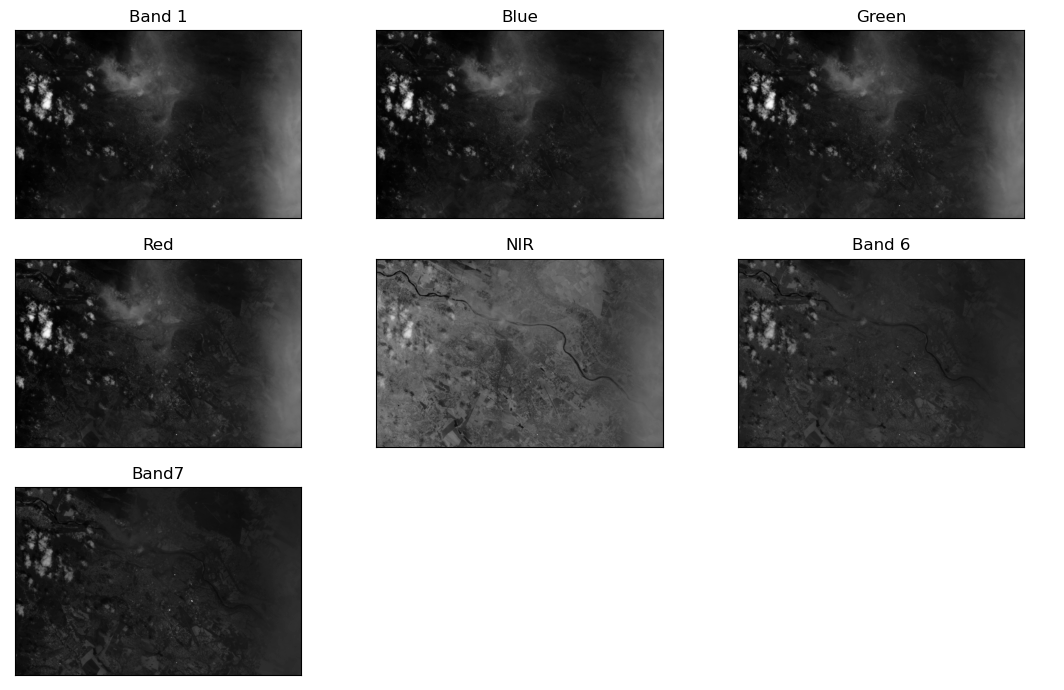

In [11]:
# Plot all bands using earthpy
band_titles = ["Band 1", "Blue", "Green", "Red",
               "NIR", "Band 6", "Band7"]

ep.plot_bands(land_stack,
              figsize=(11, 7),
              title=band_titles,
              cbar=False)
plt.show()


## 4 Робота з хмарами

### підготовка

In [39]:
import os
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches, colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import numpy.ma as ma
import pandas as pd
import rasterio as rio

from rasterio.plot import plotting_extent
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import mapping, box
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em

# Prettier plotting with seaborn
sns.set_style('white')
sns.set(font_scale=1.5)

In [7]:

cropped_file_list = ['cropped-images\\LC81830262015142LGN00_B1_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B2_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B3_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B4_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B5_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B6_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B7_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B8_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B9_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B10_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B11_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_BQA_crop.TIF'
 ]

In [8]:
stack_folder = "stackOutput"
if not os.path.isdir(stack_folder):
    os.mkdir(stack_folder)
landsat_post_path = os.path.join(stack_folder, "stack.tif")
# This will create a new stacked raster with all bands
land_stack, land_meta = es.stack(cropped_file_list, landsat_post_path)
land_stack

array([[[12807, 12589, 12588, ..., 16535, 16605, 16625],
        [12806, 12528, 12599, ..., 16527, 16576, 16623],
        [12516, 12531, 12447, ..., 16544, 16635, 16675],
        ...,
        [11747, 11713, 12081, ..., 18354, 18359, 18348],
        [11688, 11740, 11870, ..., 18361, 18344, 18325],
        [11501, 11592, 11995, ..., 18353, 18324, 18366]],

       [[12021, 11655, 11780, ..., 15775, 15847, 15921],
        [12017, 11689, 11764, ..., 15788, 15886, 15931],
        [11635, 11663, 11645, ..., 15775, 15928, 16020],
        ...,
        [10825, 10864, 11301, ..., 17717, 17721, 17692],
        [10724, 10686, 10969, ..., 17675, 17690, 17695],
        [10547, 10611, 10940, ..., 17681, 17653, 17707]],

       [[11295, 11123, 11168, ..., 14717, 14797, 14807],
        [11420, 11093, 11084, ..., 14715, 14784, 14835],
        [10990, 11249, 11246, ..., 14732, 14790, 14824],
        ...,
        [10173,  9985, 10450, ..., 16552, 16534, 16540],
        [ 9939, 10035, 10223, ..., 16523, 165

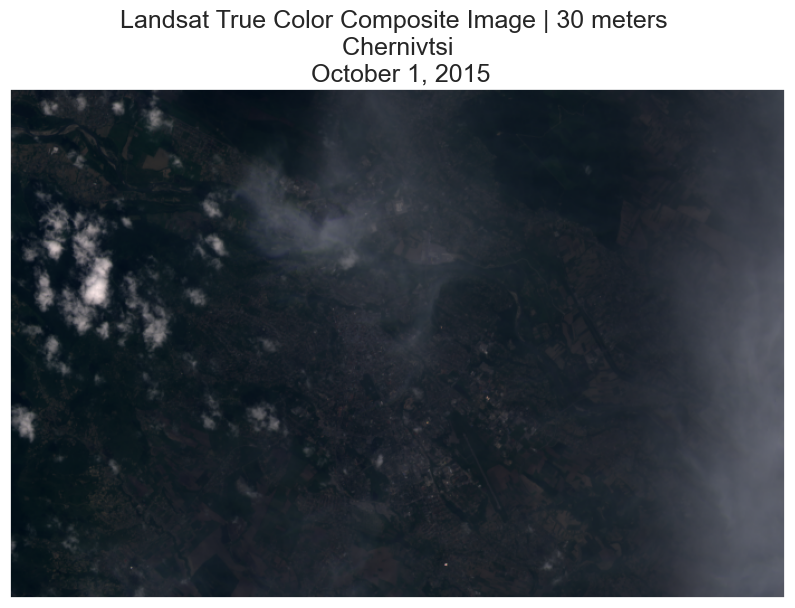

In [11]:
# Read landsat pre fire data
with rio.open(landsat_post_path) as landsat_pre_src:
    landsat_pre = landsat_pre_src.read(masked=True)
    landsat_extent = plotting_extent(landsat_pre_src)
    
ep.plot_rgb(landsat_pre,
            rgb=[3, 2, 1],
            extent=landsat_extent,
            title="Landsat True Color Composite Image | 30 meters \n Chernivtsi \n October 1, 2015")
plt.show()

### Растрові маски 1

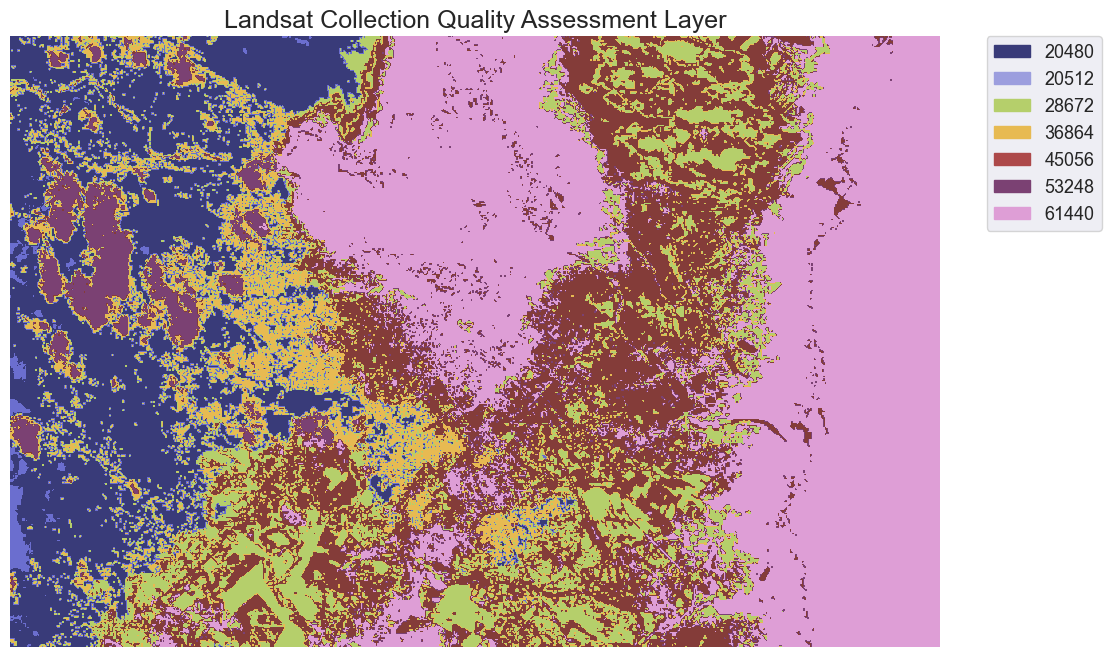

In [14]:
landsat_pre_cl_path = 'cropped-images\\LC81830262015142LGN00_BQA_crop.TIF'

# Open the pixel_qa layer for your landsat scene
with rio.open(landsat_pre_cl_path) as landsat_pre_cl:
    landsat_qa = landsat_pre_cl.read(1)
    landsat_ext = plotting_extent(landsat_pre_cl)

# This is optional code to plot the qa layer - don't worry too much about the details.
# Create a colormap with 11 colors
cmap = plt.cm.get_cmap('tab20b', 11)
# Get a list of unique values in the qa layer
vals = np.unique(landsat_qa).tolist()
bins = [0] + vals
# Normalize the colormap 
bounds = [((a + b) / 2) for a, b in zip(bins[:-1], bins[1::1])] + \
    [(bins[-1] - bins[-2]) + bins[-1]]
norm = colors.BoundaryNorm(bounds, cmap.N)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

im = ax.imshow(landsat_qa,
               cmap=cmap,
               norm=norm)

ep.draw_legend(im,
               classes=vals,
               cmap=cmap, titles=vals)

ax.set_title("Landsat Collection Quality Assessment Layer")
ax.set_axis_off()
plt.show()


In [20]:
# You can grab the cloud pixel values from earthpy
high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]

all_masked_values = cloud_shadow + cloud + high_cloud_confidence 
all_masked_values += [61440,53248]
all_masked_values 
# [328, 392, 840, 904, 1350, 352, 368, 416, 432, 480, 864, 880, 928, 944, 992, 480, 992] 

[328,
 392,
 840,
 904,
 1350,
 352,
 368,
 416,
 432,
 480,
 864,
 880,
 928,
 944,
 992,
 480,
 992,
 61440,
 53248]

In [21]:

# This is using a helper function from earthpy to create the mask so we can plot it 
# You don't need to do this in your workflow as you can perform the mask in one step 
# But we have it here for demonstration purposes
cl_mask = em._create_mask(landsat_qa, all_masked_values) 
np.unique(cl_mask) 

array([0, 1], dtype=uint16)

In [22]:
# Call the earthpy mask function using your mask layer
landsat_pre_cl_free = em.mask_pixels(landsat_pre, cl_mask)

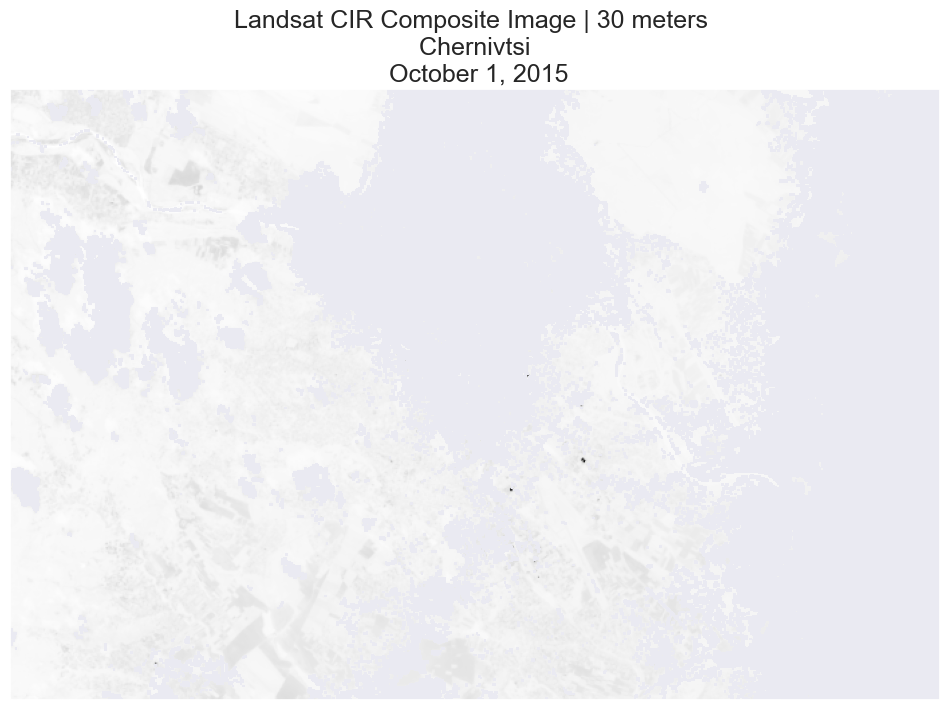

In [25]:
# Call the earthpy mask function using pixel QA layer
landsat_pre_cl_free = em.mask_pixels(
    landsat_pre, landsat_qa, vals=all_masked_values)
# Plot the data
ep.plot_bands(landsat_pre_cl_free[6],
              extent=landsat_extent,
              cmap="Greys",
              title="Landsat CIR Composite Image | 30 meters \n Chernivtsi \n October 1, 2015",
              cbar=False)
plt.show()

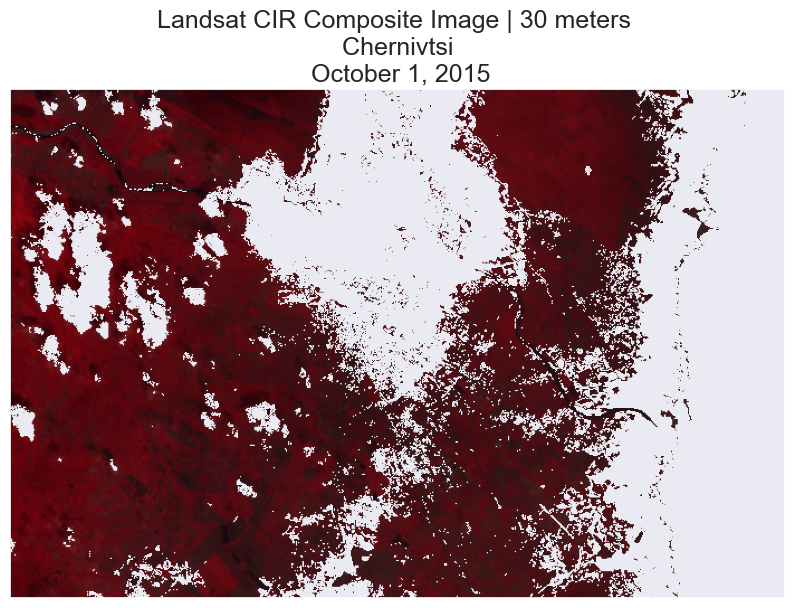

In [26]:
# Plot data
ep.plot_rgb(landsat_pre_cl_free,
            rgb=[4, 3, 2],
            extent=landsat_ext,
            title="Landsat CIR Composite Image | 30 meters \n Chernivtsi \n October 1, 2015")
plt.show()

### РАСТрові маски 2

In [31]:
vals_to_mask = all_masked_values
landsat_paths_pre = cropped_file_list

landsat_pre_cloud, landsat_pre_meta = es.stack(
    landsat_paths_pre, nodata=-9999)

# Call the earthpy mask function using pixel QA layer
landsat_pre_cloud_masked = em.mask_pixels(landsat_pre_cloud, landsat_qa,
                                          vals=vals_to_mask)
# Calculate bounds object
landsat_pre_cloud_ext_bds = rio.transform.array_bounds(
    landsat_pre_cloud.shape[1],
    landsat_pre_cloud.shape[2],
    landsat_pre_meta["transform"])

# with rio.open(landsat_pre_cl_path) as landsat_pre_cl:
#     landsat_qa = landsat_pre_cl.read(1)

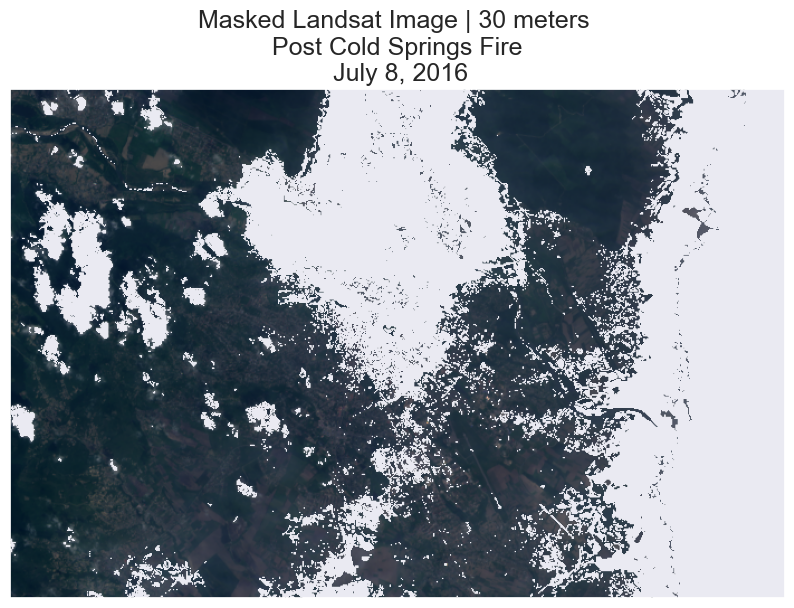

In [32]:
ep.plot_rgb(landsat_pre_cloud_masked,
            rgb=[3, 2, 1],
            title="Masked Landsat Image | 30 meters \n Post Cold Springs Fire \n July 8, 2016")
plt.show()

### РАСТрові маски 3
Читання та складання «безхмарних» даних

In [34]:
# Read in the "cloud free" landsat data that you downloaded as a part of your homework
landsat_paths_pre_cloud_free = glob(
    os.path.join("2015-04-11_LC81840262015101LGN00", "*B[1,2,3,4,5,6,7].tif"))

landsat_paths_pre_cloud_free.sort()

# Stack the data
landsat_pre_cloud_free, landsat_pre_cloud_free_meta = es.stack(
    landsat_paths_pre_cloud_free,
    nodata=-9999)

# Calculate bounds - this is just for comparison later, not required
landsat_no_clouds_bds = rio.transform.array_bounds(
    landsat_pre_cloud_free.shape[1],
    landsat_pre_cloud_free.shape[2],
    landsat_pre_cloud_free_meta["transform"])

In [36]:
# Are the bounds the same?
landsat_no_clouds_bds == landsat_pre_cloud_ext_bds
# False

False

In [40]:
# Reorder the min and max values
cloud_free_scene_bds = box(*landsat_no_clouds_bds)
cloudy_scene_bds = box(*landsat_pre_cloud_ext_bds)

# Do the data overlap spatially?
cloud_free_scene_bds.intersects(cloudy_scene_bds)
# True

True

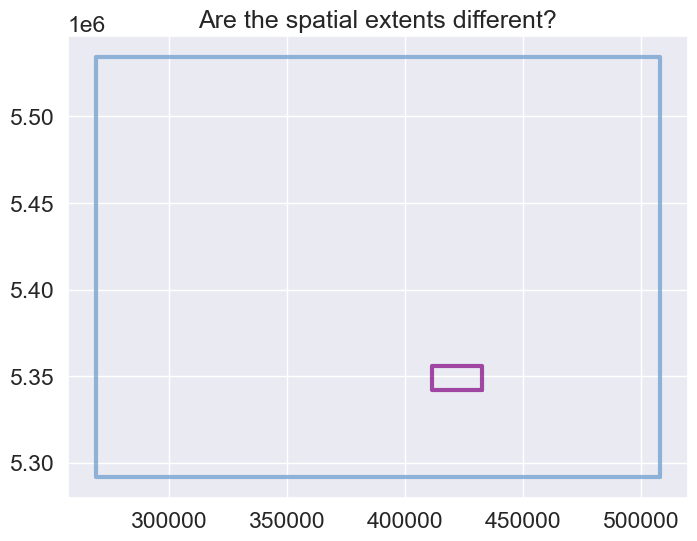

In [41]:
# Plot the boundaries
x, y = cloud_free_scene_bds.exterior.xy
x1, y1 = cloudy_scene_bds.exterior.xy

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
ax.plot(x1, y1, color='purple', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
ax.set_title('Are the spatial extents different?')
plt.show()

In [42]:
# Is the CRS the same in each raster?
landsat_pre_meta["crs"] == landsat_pre_cloud_free_meta["crs"]
# True

True

In [43]:
# Are the shapes the same?
landsat_pre_cloud.shape == landsat_pre_cloud_free.shape
# False

False

In [44]:
landsat_clouds_clip = es.extent_to_json(list(landsat_pre_cloud_ext_bds))
# Export the cloud free data as a tiff and reimport / crop the data
landsat_cloud_free_out_path = "cloud_maskOutput"

if not os.path.exists(landsat_cloud_free_out_path):
    os.makedirs(landsat_cloud_free_out_path)

cropped_cloud_list = es.crop_all(landsat_paths_pre_cloud_free, 
                                 landsat_cloud_free_out_path, 
                                 [landsat_clouds_clip], overwrite=True)

landsat_pre_cloud_free, landsat_pre_clod_free_meta = es.stack(
    cropped_cloud_list)
# View the shape of each scene. are they the same?
landsat_pre_cloud_free.shape, landsat_pre_cloud_masked.shape
# ((7, 177, 246), (7, 177, 246))


((7, 456, 694), (7, 456, 694))

In [45]:
# Get the mask layer from the pre_cloud data
mask = landsat_pre_cloud_masked.mask

# Copy the pre_cloud_data to a new array 
# so you don't impact the original array (optional but suggested!)
landsat_pre_cloud_masked_copy = np.copy(landsat_pre_cloud_masked)

# Assign every cell in the new array that is masked 
# to the value in the same cell location as the cloud free data
#landsat_pre_cloud_c[mask] = landsat_pre_noclouds_crop[mask]
landsat_pre_cloud_masked_copy[mask] = landsat_pre_cloud_free[mask]


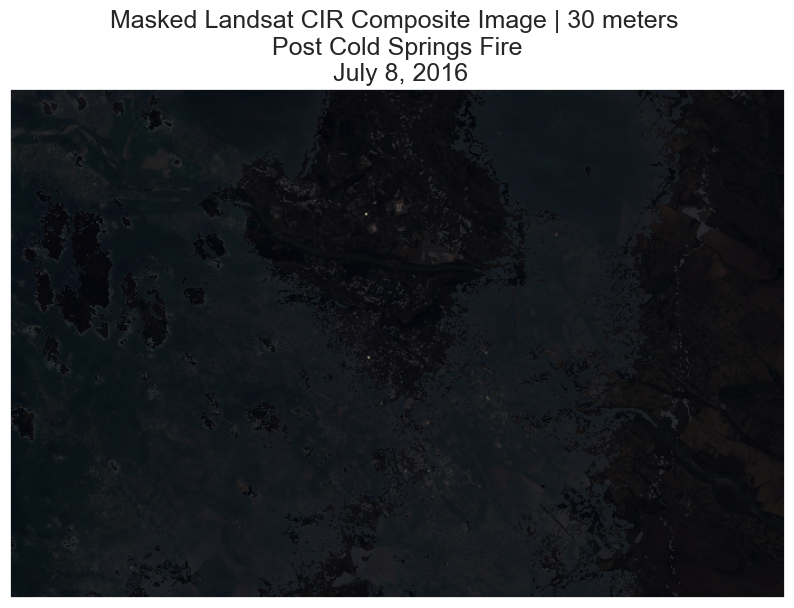

In [46]:
# Візуалізація
ep.plot_rgb(landsat_pre_cloud_masked_copy,
            rgb=[3, 2, 1],
            title="Masked Landsat CIR Composite Image | 30 meters \n Post Cold Springs Fire \n July 8, 2016")
plt.show()